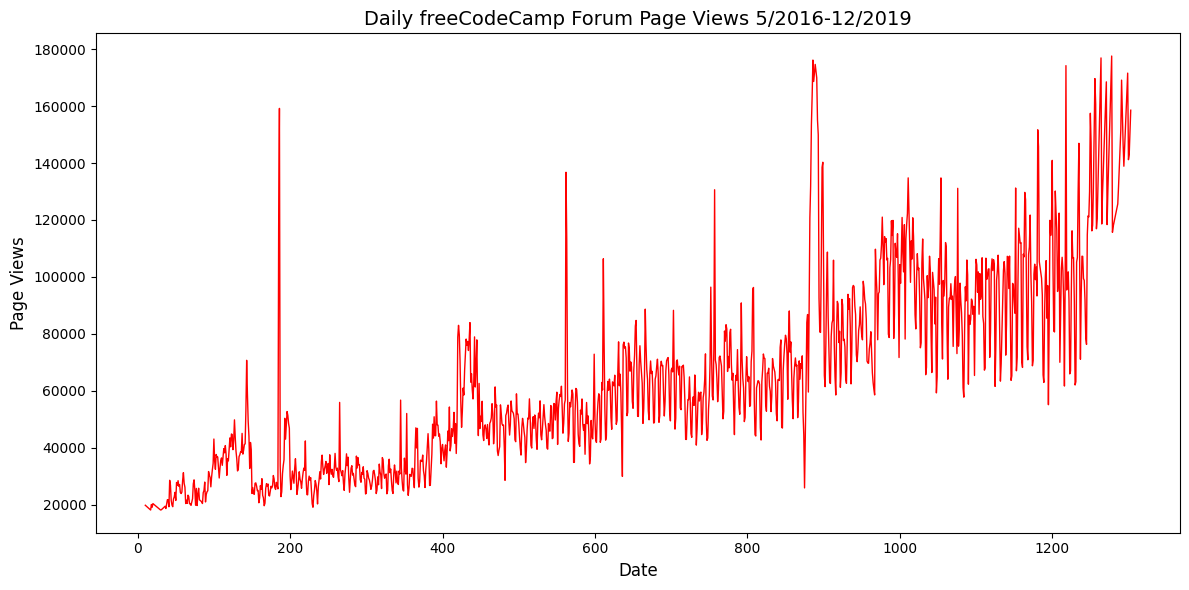

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters

# df = pd.read_csv('https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/blob/main/fcc-forum-pageviews.csv', on_bad_lines='skip', header=0)
df = pd.read_csv('D:/times-series-visualizer.txt', header=0)
# df

df_indexed = df.set_index('date')
# df_indexed

#Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
lower_limit = df['value'].quantile(0.025)
upper_limit = df['value'].quantile(0.975)

# Filtering the DataFrame
df_cleaned = df[(df['value'] >= lower_limit) & (df['value'] <= upper_limit)]
# df_cleaned

def draw_line_plot(df):
    df_cleaned = df[(df['value'] >= lower_limit) & (df['value'] <= upper_limit)]
    df_cleaned = pd.read_csv('D:/times-series-visualizer.txt', parse_dates=["date"], index_col="date")
    
    # Plotting the data
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df["value"], color="red", linewidth=1)

    # Title and labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Page Views", fontsize=12)

    #layout
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # Saving the figure
    plt.savefig("line_plot.png")

    # return fig

draw_line_plot(df_cleaned)

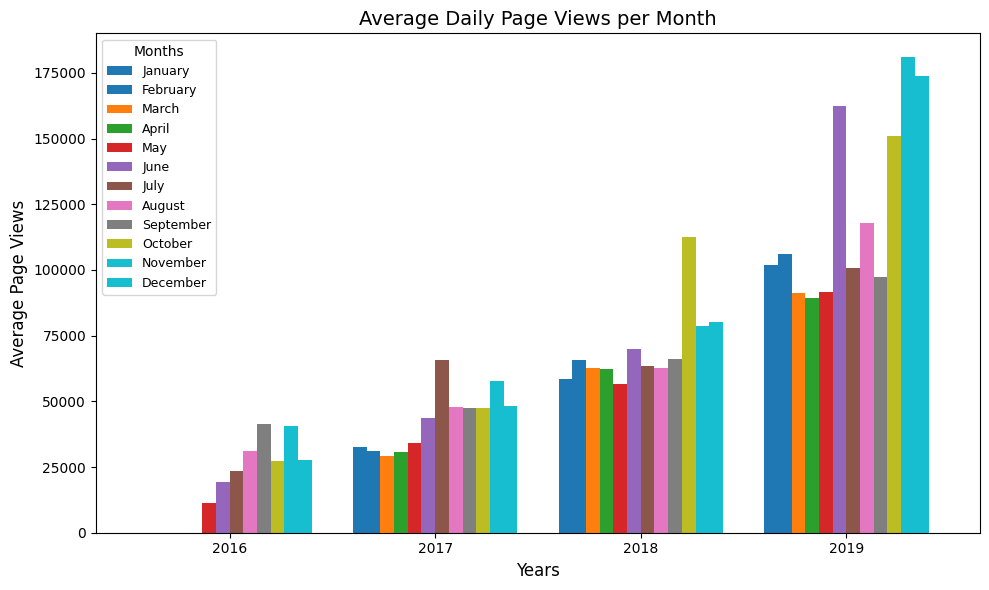

In [12]:
def draw_bar_plot(df):
    
    
    df = pd.read_csv('D:/times-series-visualizer.txt', header=0)
    
    # A bar chart showing average daily page views for each month grouped by year.
    
    
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    # Grouped by year and month, calculating the mean
    grouped_data = df.groupby(['year', 'month'])['value'].mean().unstack()

    # Plot settings
    fig, ax = plt.subplots(figsize=(10, 6))
    grouped_data.plot(kind='bar', ax=ax, width=0.8, cmap='tab10')

    # labels, title, and legend
    ax.set_xlabel('Years', fontsize=12)
    ax.set_ylabel('Average Page Views', fontsize=12)
    ax.set_title('Average Daily Page Views per Month', fontsize=14)
    ax.legend(
        title='Months', 
        labels=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ],
        title_fontsize=10, fontsize=9
    )
    
    #layout
    plt.xticks(fontsize=10, rotation=0)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    # return fig
# draw_bar_plot(df)    
    

In [3]:
def draw_box_plot(df):

    # df = pd.read_csv('D:/times-series-visualizer.txt', header=0)      
    
    df['date'] = pd.to_datetime(df['date'])
    
    # Extraction of Year and Month from the Date column
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month_name()

    # the plot figure
    plt.figure(figsize=(14, 7))

    # Creating the first box plot for Year-wise distribution (trend)
    plt.subplot(1, 2, 1)  # (rows, columns, index)
    sns.boxplot(x='Year', y='value', data=df)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('value')

    # Creating the second box plot for Month-wise distribution (Seasonality)
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Month', y='value', data=df, order=[
        'Jan.', 'Feb.', 'March', 'Apr.', 'May', 'June', 
        'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'
    ])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('value')

    # layout
    plt.tight_layout()
    # plt.show()

# draw_box_plot(df)